In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
os.chdir('/kaggle/input/tomatoleaf/tomato/')
os.listdir()

['cnn_train.py', 'val', 'train']

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [4]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, validation_split=0.3)
datagen2 = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [5]:

# Training and validation dataset
train = datagen.flow_from_directory('./train', seed=123, subset='training')
val = datagen.flow_from_directory('./train', seed=123, subset='validation')

# Test dataset for evaluation


test = datagen2.flow_from_directory('./val')

Found 7000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


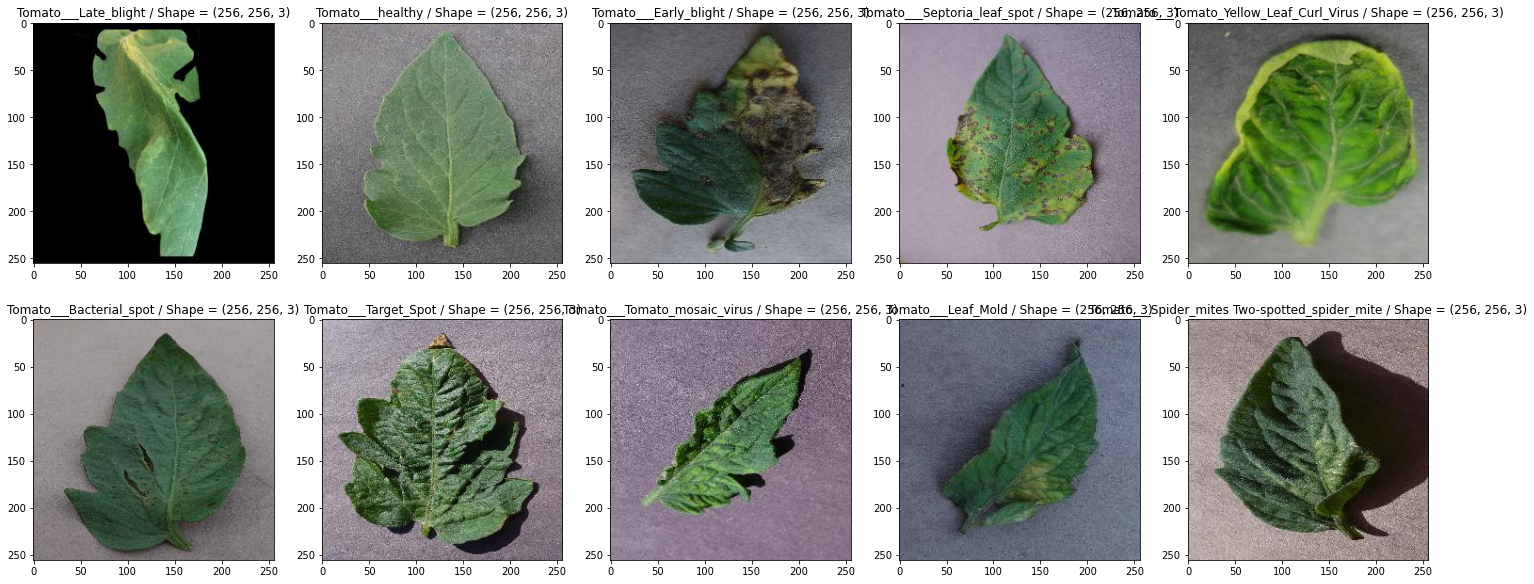

In [6]:
# Training data visualization

classes = os.listdir('./train')

plt.figure(figsize=(25,10))

for i in enumerate(classes):
    pic = os.listdir('./train/'+i[1])[0]
    image = Image.open('./train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(2,5,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()

In [7]:
# Function to initialize model (ResNet152V2)

def get_model():
    
    base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)
    
    for layers in base_model.layers[:140]:
        layers.trainable = False
    for layers in base_model.layers[140:]:
        layers.trainable = True
        
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=pred)
    
    return model

In [8]:
# Model initialization
model = get_model()
model.summary()

234553344/234545216 [==============================] - 8s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
___________________________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')

In [9]:
# Model training

model.fit(train, batch_size=80, epochs=15, validation_data=val)

Epoch 1/15
219/219 [==============================] - 135s 537ms/step - loss: 1.1646 - accuracy: 0.6361 - val_loss: 0.1630 - val_accuracy: 0.9460
Epoch 2/15
219/219 [==============================] - 99s 453ms/step - loss: 0.0873 - accuracy: 0.9795 - val_loss: 0.1208 - val_accuracy: 0.9607
Epoch 3/15
219/219 [==============================] - 99s 453ms/step - loss: 0.0315 - accuracy: 0.9950 - val_loss: 0.0986 - val_accuracy: 0.9653
Epoch 4/15
219/219 [==============================] - 99s 453ms/step - loss: 0.0121 - accuracy: 0.9983 - val_loss: 0.1167 - val_accuracy: 0.9643
Epoch 5/15
219/219 [==============================] - 99s 453ms/step - loss: 0.0134 - accuracy: 0.9973 - val_loss: 0.0869 - val_accuracy: 0.9730
Epoch 6/15
219/219 [==============================] - 99s 453ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0787 - val_accuracy: 0.9740
Epoch 7/15
219/219 [==============================] - 99s 453ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0750 - val_a

In [10]:
model.evaluate(test)

32/32 [==============================] - 10s 311ms/step - loss: 0.1294 - accuracy: 0.9650


[0.12938393652439117, 0.9649999737739563]

We are getting around 96.7% accuracy.

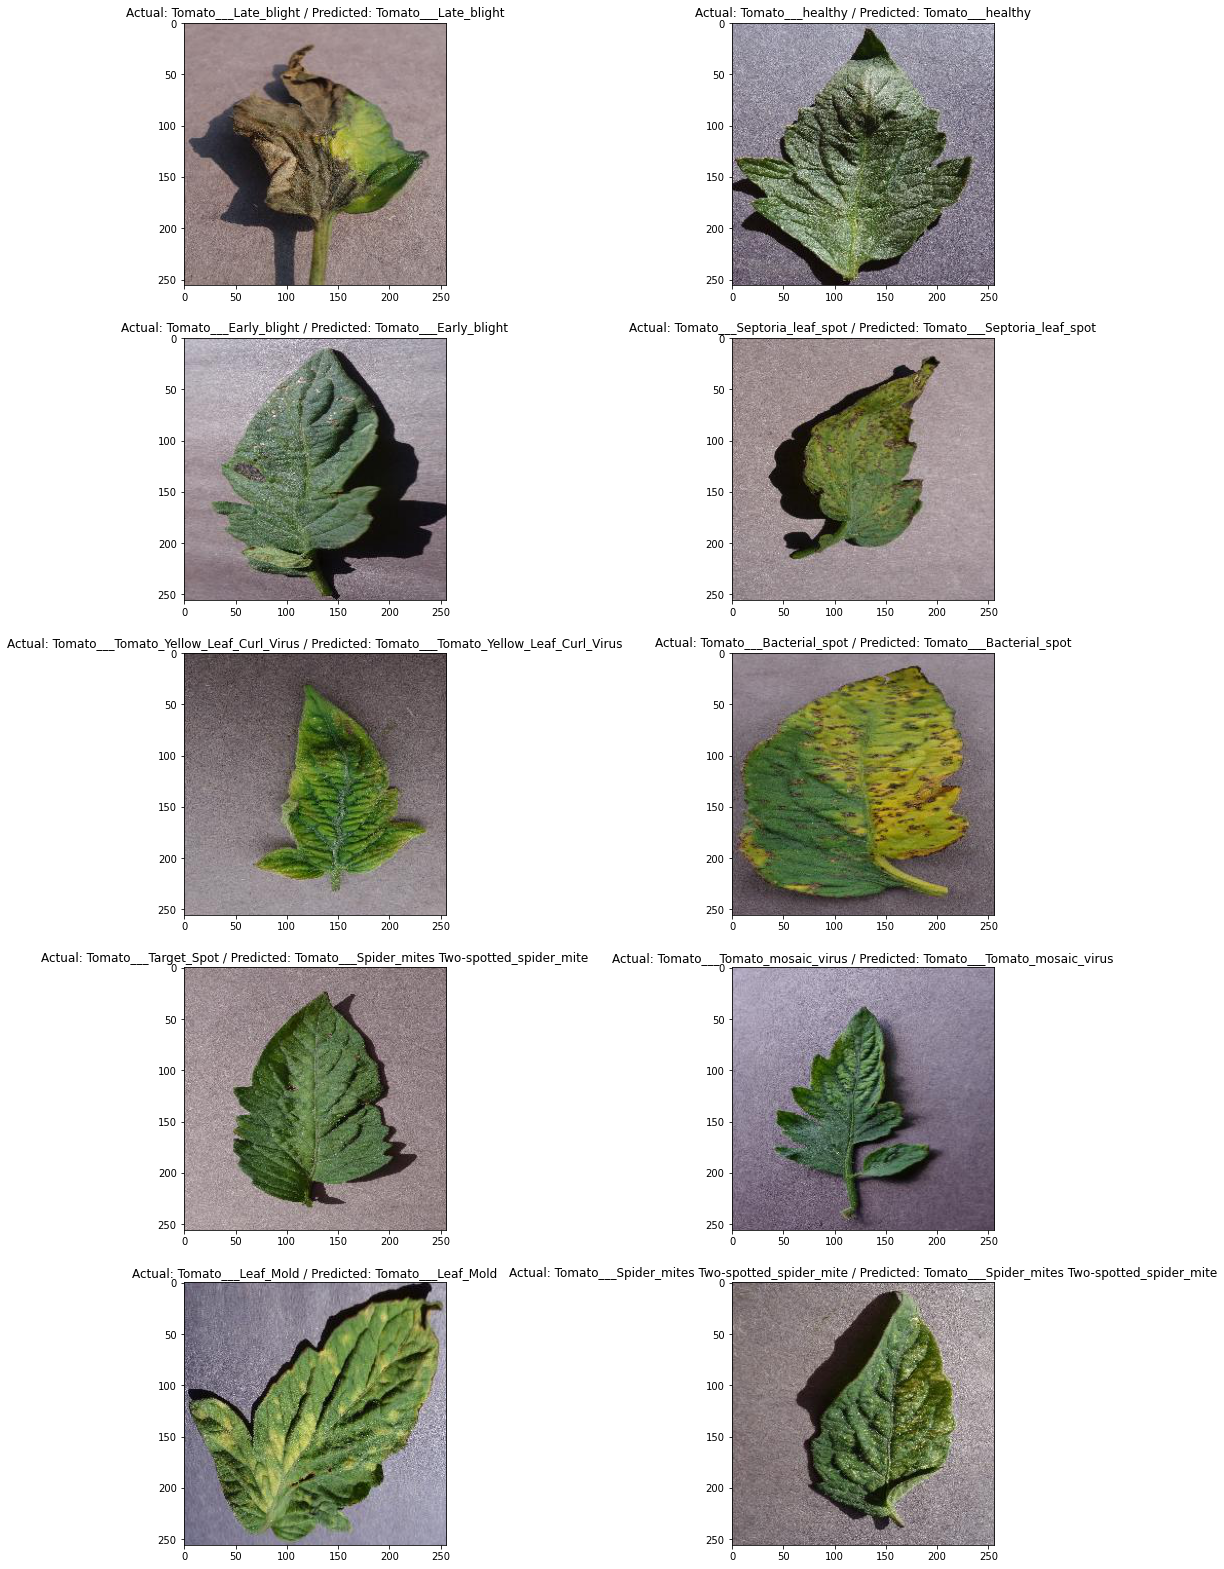

In [11]:
# Prediction and visualizations

classes = os.listdir('./val')

plt.figure(figsize=(18,28))

for i in enumerate(classes):
    pic = os.listdir('./val/'+i[1])
    pic = pic[np.random.randint(len(pic)-1)]
    image = Image.open('./val/'+i[1]+'/'+pic)
    image = np.asarray(image)
    
    pred = np.argmax(model.predict(image.reshape(-1,256,256,3)/255))
    for j in list(enumerate(list(test.class_indices.keys()))):
        if pred == j[0]:
            prediction =  j[1]
    
    plt.subplot(5,2,i[0]+1)
    plt.title('Actual: {0} / Predicted: {1}'.format(i[1], prediction))
    plt.imshow(image)
plt.show()

In [13]:
model.save('/kaggle/working/tmt.keras')

In [14]:
model_file = "model.pickle"
with open(model_file,'wb') as f:
    pickle.dump(model, f)

OSError: [Errno 30] Read-only file system: 'model.pickle'

In [ ]:
model.model_dir='/kaggle/working/'

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename))